## <b> General Imports </b> ##

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## <b> GeoJson Data (Boston) </b> ##
Note: The unique identifier used here is 'PID_LONG' (renamed as 'PID') which exists in both dataframes.

In [2]:
# loading the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file('geo/parcels.geojson')
# Rename column 'PID_long' to 'PID'
gdf = gdf.rename(columns={'PID_LONG': 'PID'})
# previewing the first entries of the dataframe
gdf.head()

,OBJECTID,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,...,PID,WPD,BATCH,Shape__Length_1,Shape__Area_1,Shape__Length_12,Shape__Area_12,Shape__Area,Shape__Length,geometry
0,1,1809294000,F_757219_2916180,FEE,18,ASSESS,None,20191107,None,N,...,1809294000,18-18-092,NaN,None,None,None,None,5061.115234,300.581750,"POLYGON ((-71.12656 42.24957, -71.12662 42.249..."
1,2,1803009001,F_765315_2926000,FEE,18,ASSESS,None,20191107,None,N,...,1803009001,18-03-085,NaN,None,None,None,None,44.310303,27.178744,"POLYGON ((-71.09668 42.27639, -71.09669 42.276..."
2,3,1400155000,F_771489_2939043,FEE,14,ASSESS,None,20191107,None,N,...,1400155000,14-01-010,NaN,None,None,None,None,2347.443359,274.308351,"POLYGON ((-71.07343 42.31205, -71.07347 42.312..."
3,4,1400355000,F_771316_2937979,FEE,14,ASSESS,None,20191107,None,N,...,1400355000,14-01-070,NaN,None,None,None,None,2969.015869,228.796861,"POLYGON ((-71.07423 42.30911, -71.07425 42.309..."
4,5,2101470000,F_754921_2951546,FEE,21,ASSESS,None,20191107,None,N,...,2101470000,21-08-050,NaN,None,None,None,None,5446.426025,302.794311,"POLYGON ((-71.13449 42.34662, -71.13470 42.346..."


origin to destination (centroid of polygons)
intensitites (ITE trip generation manueal (published rates))

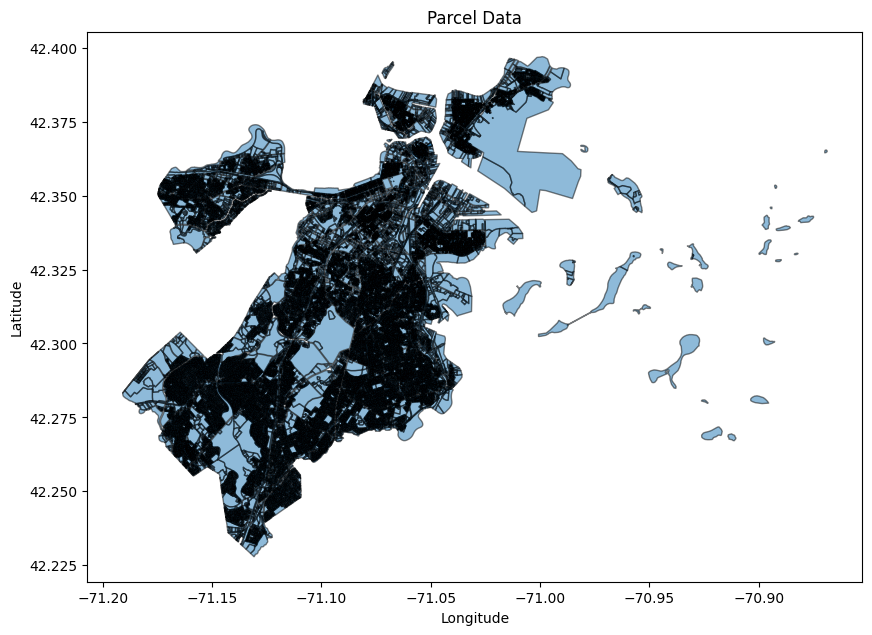

In [3]:
# Plot the parcels
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', alpha=0.5)
plt.title('Parcel Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

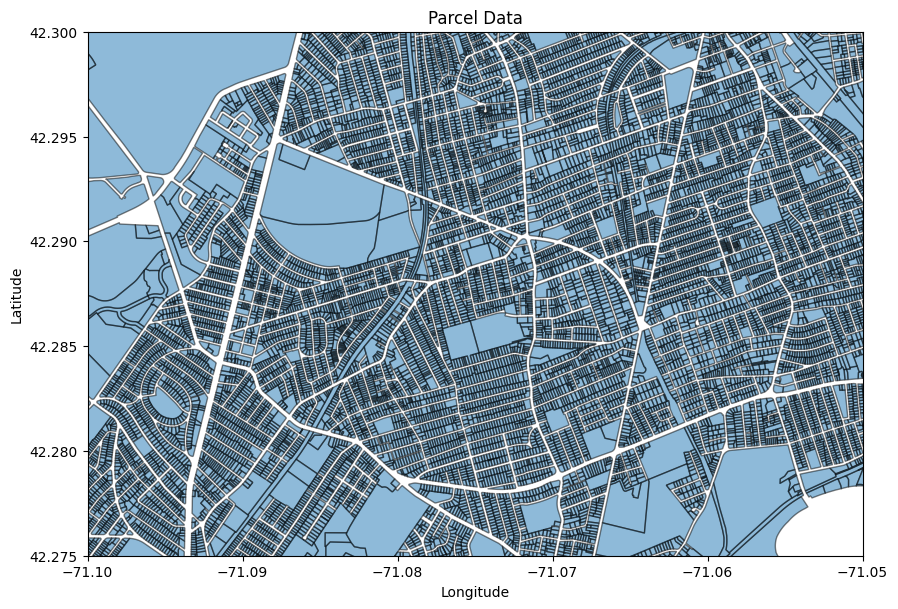

In [4]:
# plotting the parcels
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', alpha=0.5)
plt.title('Parcel Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# adding contstraints for a better view
plt.xlim(left=-71.1,right=-71.05)
plt.ylim(bottom=42.275,top=42.300)
plt.show()

## <b> Land-Use DataFrame </b> ##
The noteworthy variables in this dataframe are 'PID', 'GIS_ID', 'LUC', and 'NUM_PARKING'

In [5]:
# load property assesment data frame
propDf = pd.read_csv('geo/prop2023.csv')
# check out the first few rows
propDf.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.0,PUTNAM ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000,197.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,100003000,NaN,100003000,199.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,100004000,NaN,100004000,201.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,100005000,NaN,100005000,203.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN


## <b> Merging Geo and Land-Use DataFrames </b> ##

In [6]:
# Merge based on 'PID' column
# dropping rows where 'PID' has 'None' value
gdf = gdf.loc[gdf['PID'].notnull()]
# converting the 'PID' column in both DataFrames to the same data type for merging
gdf['PID'] = gdf['PID'].astype(int)
propDf['PID'] = propDf['PID'].astype(int)
mergeDf = pd.merge(gdf, propDf, on='PID', how='inner')

/Users/terry/micromamba/envs/deep/lib/python3.11/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [7]:
# getting an idea of the columns
mergeDf.columns

Index(['OBJECTID', 'MAP_PAR_ID', 'LOC_ID', 'POLY_TYPE', 'MAP_NO', 'SOURCE',
       'PLAN_ID', 'LAST_EDIT', 'BND_CHK', 'NO_MATCH', 'TOWN_ID', 'XCOOR',
       'YCOOR', 'OBJECTID_12', 'WARD', 'PARCEL', 'PID', 'WPD', 'BATCH',
       'Shape__Length_1', 'Shape__Area_1', 'Shape__Length_12',
       'Shape__Area_12', 'Shape__Area', 'Shape__Length', 'geometry', 'CM_ID',
       'GIS_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'CITY', 'ZIP_CODE',
       'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC', 'BLDG_TYPE', 'OWN_OCC',
       'OWNER', 'OWNER MAIL ADDRESS', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS',
       'COM_UNITS', 'RC_UNITS', 'LAND_SF', 'GROSS_AREA', 'LIVING_AREA',
       'LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT',
       'YR_REMODEL', 'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'ROOF_COVER',
       'INT_WALL', 'EXT_FNISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND',
       'BED_RMS', 'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'BDRM_COND',
       'BTHRM_STYLE1', 'BTHRM_STYLE2', 'BT

## <b>Travel Day Trip File</b> ## 
One record for each trip reported by each household member person age 5+.

In [8]:
# accessing the data set
tripData = pd.read_csv('csv/trippub.csv')
# reading out first 20 rows
tripData.head(10)

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,1,1,1000,1015,15,5.244,3,0,0,...,20,750,300,50,750,300,350,30,300,300
1,30000007,1,2,1510,1530,20,5.149,3,0,0,...,30,300,300,50,1500,750,750,20,750,300
2,30000007,2,1,700,900,120,84.004,6,0,0,...,40,1500,750,50,1500,750,750,20,750,300
3,30000007,2,2,1800,2030,150,81.628,6,0,0,...,20,750,300,40,1500,750,750,40,1500,750
4,30000007,3,1,845,900,15,2.250,3,0,0,...,20,750,300,50,750,300,350,60,750,300
5,30000007,3,2,1430,1445,15,2.243,3,0,0,...,60,750,300,50,1500,750,750,20,750,300
6,30000008,1,1,1115,1130,15,8.017,6,0,0,...,5,300,300,30,300,300,150,40,1500,750
7,30000008,1,2,2330,2340,10,8.017,6,0,0,...,40,1500,750,5,300,300,150,5,300,300
8,30000012,1,1,550,605,15,3.395,4,0,0,...,60,17000,7000,30,750,300,350,5,750,300
9,30000012,1,2,700,715,15,3.395,4,0,0,...,5,750,300,80,17000,17000,5000,60,17000,7000


## <b> Splitting Data into 1 hour+ Trips </b> ##
trip purposes for trip groups, trip purposes where stay duration is near an hour (60 to 90) for turnover of spots, distribution of trip purposes at least an hour
WHYTO (100 mile long trips destination)
tour vs loop trip

In [9]:
# long trips (1 hour or more trips)
longTrips = tripData[tripData['TRVLCMIN'] >= 60]
# get weights for long trips
longTripWeights = longTrips['WTTRDFIN']
# turnover trips (between 60 and 90 minutes)
turnoverTrips = longTrips[(longTrips['DWELTIME'] >= 45) & (longTrips['DWELTIME'] <= 120)]
# get weights for turnover trips
turnoverWeights = turnoverTrips['WTTRDFIN']

In [10]:
# get an idea for where trips end
turnoverTrips['WHYTO'].value_counts()

WHYTO
 1     1963
 13    1507
 11    1138
 15     832
 17     822
 18     805
 3      694
 7      571
 4      452
 16     351
 19     291
 14     249
 6      238
 12     160
 5       70
 8       60
 97      58
 2       45
 9       13
 10       7
-7        4
-8        2
Name: count, dtype: int64

In [11]:
# defininig list of values to be dropped
dropVals = [-9,-8,-7,97]
# filtering the DataFrame to exclude rows with irrelevant values in the 'WHYTO' column
turnoverTrips = turnoverTrips[~turnoverTrips['WHYTO'].isin(dropVals)]
# checking out the filtered results
turnoverTrips['WHYTO'].value_counts()

WHYTO
1     1963
13    1507
11    1138
15     832
17     822
18     805
3      694
7      571
4      452
16     351
19     291
14     249
6      238
12     160
5       70
8       60
2       45
9       13
10       7
Name: count, dtype: int64

## <b> Mapping Survey Destinations to DataFrame </b> ##
Making some strong assumptions to map specific locations to those corresponding to 'LUC' values

In [12]:
mergeDf[mergeDf['LUC']==13]

,OBJECTID,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
27,28,1300758010,F_770865_2939420,FEE,13,ASSESS,None,20191107,None,N,...,M - Modern,M - Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
99,100,1400544000,F_769937_2939028,FEE,14,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
159,159,0103662000,F_780535_2963052,FEE,1,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
167,168,2010655010,F_745221_2923004,FEE,20,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
177,178,1403353000,F_767445_2928941,FEE,14,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98241,98432,0105590100,F_780105_2961054,FEE,1,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
98248,98439,0901414000,F_768277_2948036,FEE,9,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
98281,98473,0600222000,F_776213_2949030,FEE,6,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98412,98604,0104901000,F_781588_2959273,FEE,1,ASSESS,None,20191107,None,N,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [13]:
mergeDf['NUM_PARKING']

0        4.0
1        NaN
2        NaN
3        0.0
4        NaN
        ... 
98651    3.0
98652    NaN
98653    NaN
98654    NaN
98655    NaN
Name: NUM_PARKING, Length: 98656, dtype: float64

In [14]:
mergeDf['LUC'].value_counts()

LUC
101    30401
104    16886
105    13343
995    10492
132     4254
       ...  
375        1
982        1
417        1
914        1
108        1
Name: count, Length: 190, dtype: int64

## <b> Categorizing Buildings (in merged DataFrame) </b> ##
1: residential, 2: hotel/logding, 3: recereational, 4: medical, 5: retail, 6: storage, 7: services, 8: parking, 9: restaurants, 10: supermarkets, 11: gas stations, 12: office, 13: government, 14: school, 15: church, 16: airtravel, 17: industrial, 77: other

In [15]:
# defining mappings between 'LUC' (mergeDf) and 'WHYTO' (tripData)
mappings = {
    10: 1, 319: 5, 380: 3, 441: 77, 981: 17,
    12: 77, 320: 5, 381: 3, 442: 77, 982: 13,
    13: 1, 321: 5, 382: 7, 444: 77, 983: 77,
    19: 1, 322: 5, 383: 3, 445: 17, 984: 3,
    25: 1, 323: 5, 384: 6, 446: 17, 985: 77,
    26: 1, 324: 10, 385: 12, 450: 17, 986: 77,
    27: 1, 325: 5, 386: 3, 465: 77, 987: 77,
    31: 1, 326: 9, 387: 8, 900: 13, 988: 2,
    101: 1, 327: 9, 388: 77, 901: 13, 989: 16,
    102: 1, 328: 9, 389: 77, 902: 13, 990: 5,
    103: 1, 329: 9, 390: 77, 903: 13, 991: 12,
    104: 1, 330: 5, 391: 77, 904: 14, 992: 1,
    105: 1, 331: 5, 392: 77, 905: 77, 993: 17,
    106: 1, 332: 7, 393: 77, 906: 15, 995: 12,
    107: 1, 333: 11, 394: 6, 907: 77, 999: 77,
    108: 8, 334: 5, 395: 16, 908: 1,
    109: 1, 335: 7, 396: 6, 914: 13,
    110: 6, 336: 8, 397: 16, 923: 13,
    111: 1, 337: 8, 398: 16, 924: 13,
    112: 1, 338: 8, 399: 3, 925: 13,
    113: 1, 339: 8, 400: 17, 929: 13,
    114: 1, 340: 12, 401: 17, 937: 1,
    115: 1, 341: 12, 402: 17, 941: 3,
    116: 1, 342: 4, 403: 17, 942: 14,
    117: 1, 343: 12, 404: 17, 943: 14,
    118: 1, 344: 12, 405: 17, 945: 3,
    119: 1, 345: 12, 406: 17, 946: 5,
    120: 1, 346: 12, 407: 17, 947: 3,
    121: 1, 347: 12, 408: 17, 948: 7,
    122: 1, 348: 12, 409: 17, 949: 6,
    123: 1, 350: 13, 410: 17, 950: 1,
    124: 1, 351: 3, 412: 17, 951: 1,
    125: 1, 352: 7, 413: 17, 952: 12,
    126: 1, 353: 3, 414: 17, 953: 4,
    127: 1, 354: 7, 415: 17, 954: 4,
    128: 1, 355: 7, 416: 17, 955: 12,
    129: 1, 356: 1, 417: 17, 956: 7,
    130: 1, 357: 1, 418: 17, 957: 7,
    131: 1, 358: 12, 419: 17, 958: 7,
    132: 1, 359: 8, 420: 17, 959: 1,
    202: 1, 360: 3, 421: 17, 960: 12,
    211: 1, 361: 3, 422: 17, 961: 8,
    300: 2, 362: 3, 423: 17, 962: 8,
    301: 2, 363: 3, 424: 17, 963: 6,
    302: 2, 364: 3, 425: 17, 965: 13,
    303: 3, 365: 3, 426: 17, 966: 17,
    304: 4, 366: 3, 427: 17, 967: 5,
    305: 4, 367: 3, 428: 17, 968: 6,
    306: 12, 368: 3, 429: 17, 969: 6,
    307: 7, 369: 5, 430: 17, 970: 15,
    309: 4, 370: 3, 431: 17, 971: 15,
    310: 7, 371: 3, 432: 17, 972: 13,
    311: 7, 372: 3, 433: 17, 973: 12,
    312: 6, 373: 3, 434: 17, 974: 13,
    313: 6, 374: 3, 435: 17, 975: 13,
    314: 6, 375: 3, 436: 17, 976: 14,
    315: 6, 376: 3, 437: 17, 977: 14,
    316: 6, 377: 3, 438: 17, 978: 3,
    317: 6, 378: 14, 439: 17, 979: 4,
    318: 6, 379: 15, 440: 77, 980: 17,
}

In [16]:
# creating a new column 'BLD_GRP' based on mapping of 'LUC' values
mergeDf['BLD_GRP'] = mergeDf['LUC'].map(mappings)
# displaying intial groupings
mergeDf['BLD_GRP'].value_counts()

BLD_GRP
1.0     75377
12.0    11469
77.0     4532
13.0     1969
5.0      1281
14.0      715
8.0       513
6.0       512
7.0       472
15.0      466
9.0       440
17.0      332
4.0       266
3.0       157
2.0        73
10.0       46
11.0       31
16.0        2
Name: count, dtype: int64

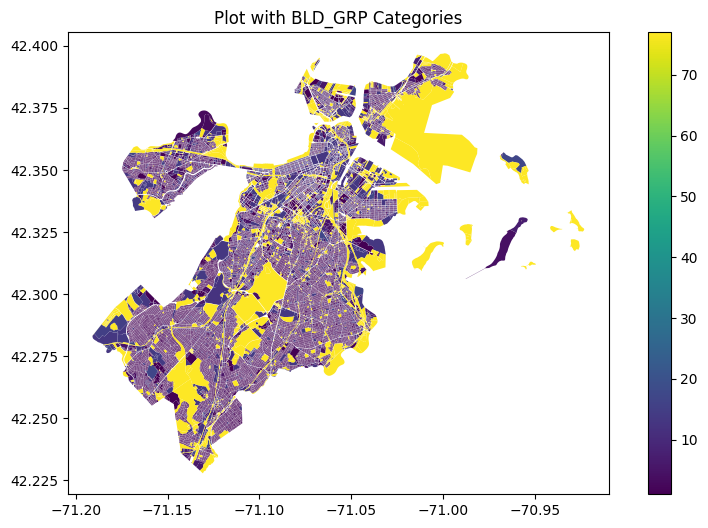

In [17]:
# plotting the GeoPandas objects in mergeDf using the 'BLD_GRP' column for coloring
mergeDf.plot(column='BLD_GRP', legend=True, figsize=(10, 6))  # Adjust figsize as needed
plt.title('Plot with BLD_GRP Categories')
plt.show()

## <b> Defining a Basic Scoring Function </b> ##
A preliminary function to establish a basis for charging station location optimality.

<b>As a reminder:</b>
<i> 1: residential, 2: hotel/logding, 3: recereational, 4: medical, 5: retail, 6: storage, 7: services, 8: parking, 9: restaurants, 10: supermarkets, 11: gas stations, 12: office, 13: government, 14: school, 15: religious building, 16: airtravel, 17: industrial, 77: other </i>

In [18]:
# defining a basic scoring function
def simpleScore(row):
    # defining building weights weights for different factors
    bldWeights = {1: 0.2, 2: 0.5, 3: 0.7, 4: 0.1, 5: 0.9, 
                  6: 0.4, 7: 0.5, 8: 0.75, 9: 0.9, 10: 0.9,
                  11: 0.1, 12: 0.3, 13: 0.2, 14: 0.1, 15: 0.6,
                  16: 0.1, 17: 0.2, 77: 0.1}
    
    # extracting values from the row
    bldTyp = row['BLD_GRP']

    # these need special case handling since many are NaN
    # area = row['Shape__Area'] if not pd.isnull(row['Shape__Area']) else 0
    num_parking = row['NUM_PARKING'] if not pd.isnull(row['NUM_PARKING']) else 0
    
    # Calculate score based on your scoring formula
    score = bldWeights.get(bldTyp, 1.0) + num_parking
    
    return score

In [19]:
# applying the scoring function to create the 'Score' column
mergeDf['Score'] = mergeDf.apply(simpleScore, axis=1)
# displaying the scoring
mergeDf['Score']

0        4.2
1        0.2
2        0.2
3        0.2
4        0.2
        ... 
98651    3.2
98652    0.1
98653    0.1
98654    0.1
98655    0.1
Name: Score, Length: 98656, dtype: float64

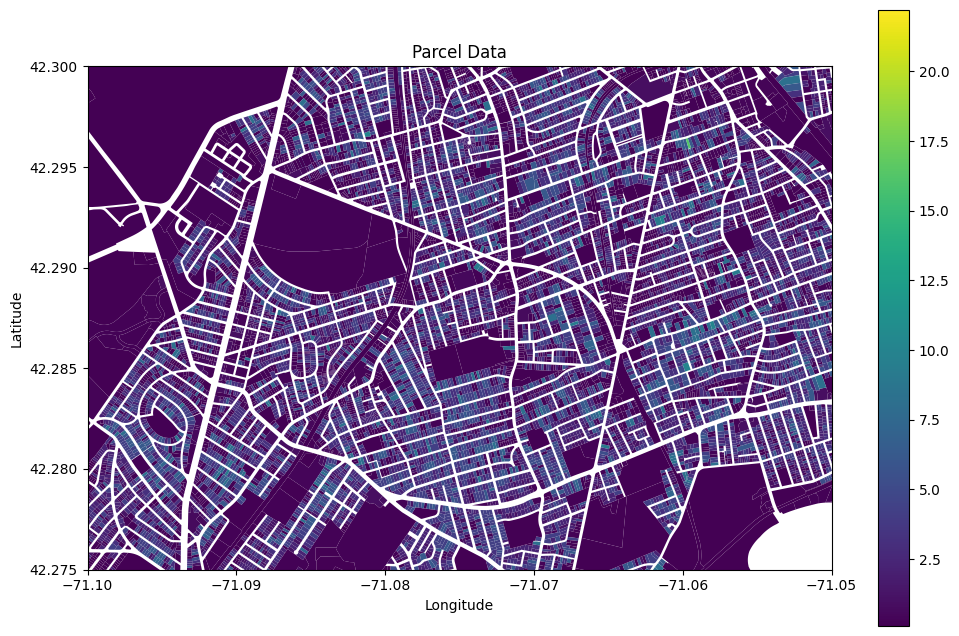

In [20]:
# plotting the parcels
mergeDf.plot(column='Score', legend=True, figsize=(12, 8)) 
plt.title('Parcel Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# adding contstraints for a better view
plt.xlim(left=-71.1,right=-71.05)
plt.ylim(bottom=42.275,top=42.300)
plt.show()

use nhts data to find locations with greatest frequency of travel to for trips with turnover rates between 45 minutes and 120 minutes

land use, how high the land is ranked, and intensity (number of trips generated by that land use) (multipl)

spread sheet of land use codes and what they are analgous to in nhts trip purpose data and yet anothr column for what they are analagous to in

land use of each parcel and square footage of each parcel (multiple lad use by trip genreation)

ite trip generation tip: really niche (use the most general categories that i can (i.e. retail)) as broad as possible! residential, shopping center(basic retail), 

centroid of each parcel 

GeoJson Output: point location and its score